## Importing 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import mean_absolute_error

### Ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the files

In [3]:
file_path = 'train.csv'
home_data=pd.read_csv(file_path,low_memory=False)            #These commands read the train and test files.
test_file_path = 'test.csv'
test_data=pd.read_csv(test_file_path,low_memory=False)

In [4]:
test_data.isna().sum()

ID                       0
comp_name                1
website                284
op_status                0
domain                 213
founded_on            1190
hq_country_code        468
hq_state_code          576
hq_region              555
hq_city                555
total_funding_usd      850
funding_rounds           0
first_funding_date       0
last_funding_date        0
num_investors            0
funding_duration         0
first_funding_utc        0
last_funding_utc         0
dtype: int64

## Data Exploration

In [5]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40213 entries, 0 to 40212
Data columns (total 19 columns):
ID                       40213 non-null int64
comp_name                40213 non-null object
website                  37746 non-null object
op_status                40213 non-null object
domain                   38007 non-null object
founded_on               29999 non-null object
hq_country_code          35699 non-null object
hq_state_code            34623 non-null object
hq_region                34965 non-null object
hq_city                  34967 non-null object
total_funding_usd        32548 non-null float64
funding_rounds           40213 non-null int64
first_funding_date       40213 non-null object
last_funding_date        40213 non-null object
num_investors            40213 non-null int64
funding_duration         40213 non-null int64
first_funding_utc        40213 non-null int64
last_funding_utc         40213 non-null int64
successful_investment    40213 non-null int64
dtyp

In [6]:
home_data.isna().sum()

ID                           0
comp_name                    0
website                   2467
op_status                    0
domain                    2206
founded_on               10214
hq_country_code           4514
hq_state_code             5590
hq_region                 5248
hq_city                   5246
total_funding_usd         7665
funding_rounds               0
first_funding_date           0
last_funding_date            0
num_investors                0
funding_duration             0
first_funding_utc            0
last_funding_utc             0
successful_investment        0
dtype: int64

In [7]:
home_data.columns   

Index(['ID', 'comp_name', 'website', 'op_status', 'domain', 'founded_on',
       'hq_country_code', 'hq_state_code', 'hq_region', 'hq_city',
       'total_funding_usd', 'funding_rounds', 'first_funding_date',
       'last_funding_date', 'num_investors', 'funding_duration',
       'first_funding_utc', 'last_funding_utc', 'successful_investment'],
      dtype='object')

In [8]:
home_data.dtypes

ID                         int64
comp_name                 object
website                   object
op_status                 object
domain                    object
founded_on                object
hq_country_code           object
hq_state_code             object
hq_region                 object
hq_city                   object
total_funding_usd        float64
funding_rounds             int64
first_funding_date        object
last_funding_date         object
num_investors              int64
funding_duration           int64
first_funding_utc          int64
last_funding_utc           int64
successful_investment      int64
dtype: object

In [9]:
home_data.head()

,ID,comp_name,website,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,first_funding_date,last_funding_date,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment
0,0,Nanotecture,http://www.nanotecture.co.uk,closed,Nanotechnology,NaN,GBR,M4,London,Southampton,6820000.0,1,04-05-2005,04-05-2005,4,0,12907,12907,0
1,1,Sybari,http://www.sybari.com,acquired,Email|Security|Software,01-01-1995,USA,NY,Long Island,East Northport,NaN,1,30-03-2001,30-03-2001,1,0,11411,11411,1
2,2,Futurederm,http://www.futurederm.com,operating,Beauty|Cosmetics|E-Commerce|Social Media,07-06-2009,USA,PA,Pittsburgh,Pittsburgh,165778.0,5,25-10-2012,27-05-2014,4,579,15638,16217,0
3,3,Mercora,http://mercora.com,closed,Curated Web,NaN,USA,CA,SF Bay Area,Sunnyvale,5000000.0,1,01-01-2005,01-01-2005,1,0,12784,12784,0
4,4,Datos IO,http://www.datos.io,operating,Big Data|Cloud Computing|Databases|Enterprise ...,01-06-2014,USA,CA,SF Bay Area,San Jose,15250000.0,2,01-07-2014,15-09-2015,4,441,16252,16693,0


## Data Cleaning

In [10]:
home_data = home_data.loc[:, ~home_data.columns.str.contains('^Unnamed')]

##### By this we get to understand that for all the data which has op status as operating the investment must not be done.

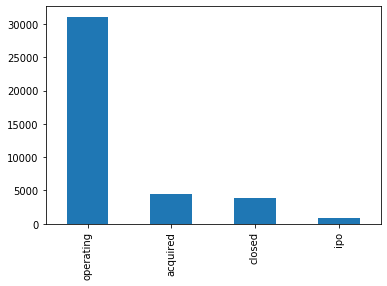

In [11]:
home_data['op_status'].value_counts().plot.bar()

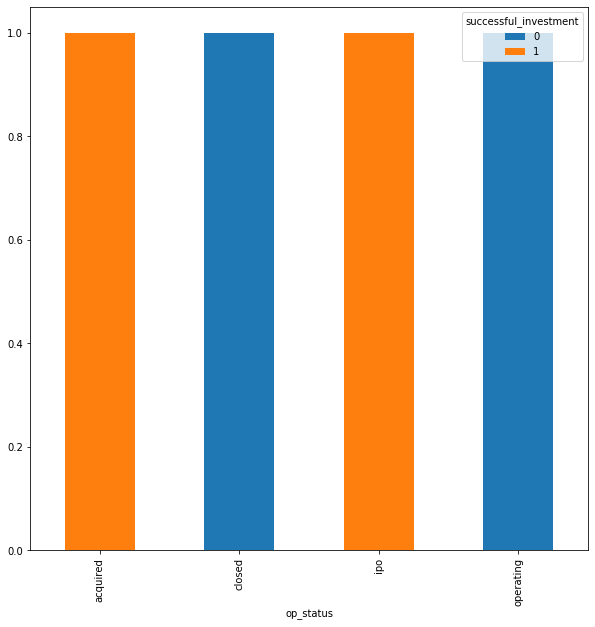

In [12]:
status=pd.crosstab(home_data['op_status'],home_data['successful_investment']) 
status.div(status.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))

In [13]:
home_data[home_data['op_status']=='operating'].head()    

,ID,comp_name,website,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,first_funding_date,last_funding_date,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment
2,2,Futurederm,http://www.futurederm.com,operating,Beauty|Cosmetics|E-Commerce|Social Media,07-06-2009,USA,PA,Pittsburgh,Pittsburgh,165778.0,5,25-10-2012,27-05-2014,4,579,15638,16217,0
4,4,Datos IO,http://www.datos.io,operating,Big Data|Cloud Computing|Databases|Enterprise ...,01-06-2014,USA,CA,SF Bay Area,San Jose,15250000.0,2,01-07-2014,15-09-2015,4,441,16252,16693,0
6,6,Telemedi.co,http://telemedi.co/en,operating,Bridging Online and Offline|Doctors|Telecommun...,NaN,GBR,L3,Rotherham,Rotherham,132222.0,2,23-04-2014,01-08-2014,2,100,16183,16283,0
8,8,Comviva,http://www.comviva.com,operating,Mobile,NaN,USA,IN,NaN,NaN,13500000.0,1,04-12-2005,04-12-2005,3,0,13121,13121,0
9,9,BinaryVR,http://www.binaryvr.com/,operating,Technology,NaN,USA,CA,SF Bay Area,San Jose,400000.0,1,22-09-2015,22-09-2015,1,0,16700,16700,0


In [14]:
home_data[home_data['op_status']=='closed'].head()       #No successful investment
  

,ID,comp_name,website,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,first_funding_date,last_funding_date,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment
0,0,Nanotecture,http://www.nanotecture.co.uk,closed,Nanotechnology,NaN,GBR,M4,London,Southampton,6820000.0,1,04-05-2005,04-05-2005,4,0,12907,12907,0
3,3,Mercora,http://mercora.com,closed,Curated Web,NaN,USA,CA,SF Bay Area,Sunnyvale,5000000.0,1,01-01-2005,01-01-2005,1,0,12784,12784,0
7,7,Taggstr,http://www.taggstr.com,closed,iPhone|Location Based Services|Messaging|Mobil...,01-07-2009,USA,CA,SF Bay Area,San Jose,50000.0,1,07-04-2010,07-04-2010,1,0,14706,14706,0
16,16,The Daily Hundred,http://dailyhundred.com,closed,Advertising|Gamification|Mobile|Photography|Sa...,01-04-2012,USA,FL,Tampa,Tampa,1050000.0,3,01-09-2012,09-09-2013,6,373,15584,15957,0
18,18,Ardext Technologies,NaN,closed,Electronics|Software|Testing,NaN,NaN,NaN,NaN,NaN,1938000.0,5,22-09-2000,17-11-2003,5,1151,11222,12373,0


In [15]:
home_data[home_data['op_status']=='acquired'].head()     #Successful investment is done


,ID,comp_name,website,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,first_funding_date,last_funding_date,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment
1,1,Sybari,http://www.sybari.com,acquired,Email|Security|Software,01-01-1995,USA,NY,Long Island,East Northport,NaN,1,30-03-2001,30-03-2001,1,0,11411,11411,1
12,12,Open Harbor,https://www.openharbor.com,acquired,Marketing Automation|Real Time|Trading,01-01-1999,USA,CA,SF Bay Area,San Carlos,1.000000e+07,1,19-11-2001,19-11-2001,4,0,11645,11645,1
14,14,PopCap Games,http://www.popcap.com,acquired,Games,01-01-2000,USA,WA,Seattle,Seattle,2.986646e+07,2,25-05-2009,06-10-2009,3,134,14389,14523,1
21,21,Clearwire,http://www.clearwire.com,acquired,Internet|Mobile,01-10-2003,USA,WA,Seattle,Kirkland,5.820000e+09,6,11-12-2001,27-02-2013,21,4096,11667,15763,1
28,28,Silverback Systems,NaN,acquired,Web Hosting,01-01-2000,USA,CA,SF Bay Area,Campbell,4.600000e+07,3,24-09-2001,25-04-2006,11,1674,11589,13263,1


In [16]:
home_data[home_data['op_status']=='ipo'].head() 

,ID,comp_name,website,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,first_funding_date,last_funding_date,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment
5,5,Amazon,http://amazon.com,ipo,Consumer Goods|Crowdsourcing|Delivery|E-Commer...,05-07-1994,USA,WA,Seattle,Seattle,8000000.0,1,01-07-1995,01-07-1995,1,0,9312,9312,1
29,29,Seres Health,http://sereshealth.com,ipo,Biotechnology,01-01-2010,USA,MA,Boston,Cambridge,113000000.0,4,27-11-2012,06-01-2015,8,770,15671,16441,1
204,204,Orad,http://www.orad.cc,ipo,Security,NaN,ISR,5,Tel Aviv,Holon,28765834.0,3,01-01-1996,01-01-2014,3,6575,9496,16071,1
348,348,Array BioPharma,http://arraybiopharma.com,ipo,Biotechnology,01-01-1998,USA,CO,Denver,Boulder,85000000.0,1,02-03-2015,02-03-2015,1,0,16496,16496,1
452,452,Qualys,https://www.qualys.com,ipo,Security|Software,01-01-1999,USA,CA,SF Bay Area,Redwood City,NaN,1,12-11-2003,12-11-2003,1,0,12368,12368,1


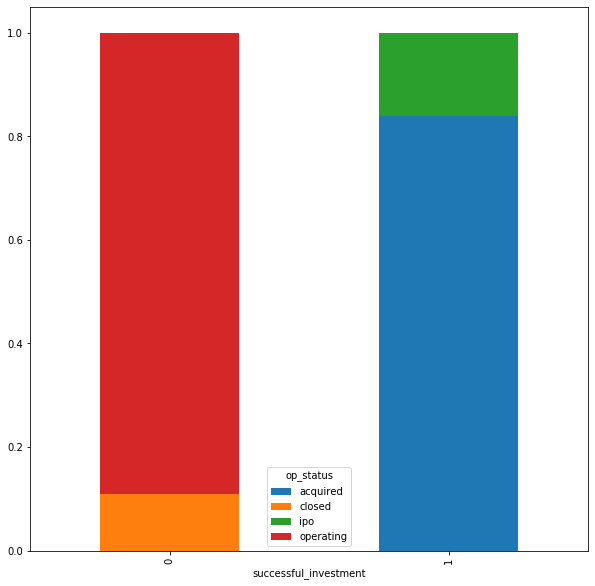

In [17]:
status=pd.crosstab(home_data['successful_investment'],home_data['op_status']) 
status.div(status.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))

### Replacing op_status by their classification

In [18]:
home_data.op_status[home_data.op_status == 'operating'] = 0           #As in the train file the op_status data type is string it 
home_data.op_status[home_data.op_status == 'closed'] = 0              #would be better if we convert them into int dtype.
home_data.op_status[home_data.op_status == 'acquired'] = 1          #These commands convert them to their respectively given integres
home_data.op_status[home_data.op_status == 'ipo'] = 1

In [19]:
test_data.op_status[test_data.op_status == 'operating'] = 0
test_data.op_status[test_data.op_status == 'closed'] = 0            #The same above step is being done for the test file. 
test_data.op_status[test_data.op_status == 'acquired'] = 1
test_data.op_status[test_data.op_status == 'ipo'] = 1

# Graphs

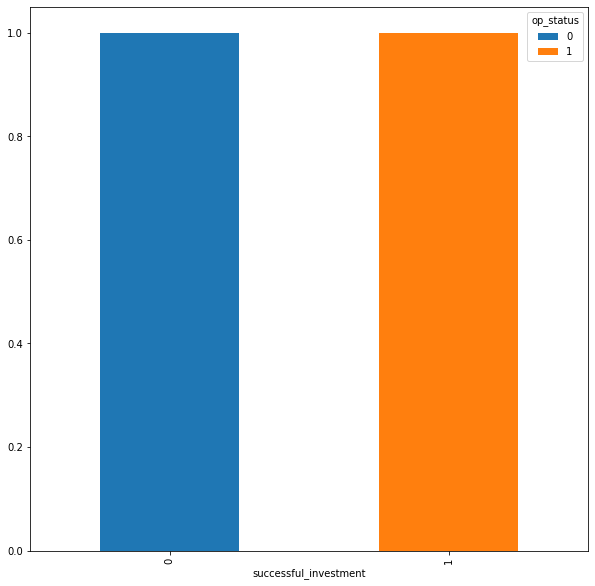

In [20]:
status=pd.crosstab(home_data['successful_investment'],home_data['op_status']) 
status.div(status.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))

## Training our model

In [21]:
y=home_data.successful_investment
home_features=[ 'op_status']
X=home_data[home_features]
test_X = test_data[home_features]           
train_X = home_data[home_features]

## Using DecisionTreeClassifier and calculating MAE

In [22]:
# home_model=DecisionTreeClassifier(random_state=1)
# home_model.fit(X,y)
# predictions=home_model.predict(test_X)

In [23]:

train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.33,random_state=1)
home_model=DecisionTreeClassifier(random_state=1)
home_model.fit(train_X, train_y)
val_predictions = home_model.predict(val_X)                 #These commands are used to calculate the MEAN ABSOLUTE ERROR
val_mae = mean_absolute_error(val_predictions, val_y)
predictions=home_model.predict(test_X)
print("MAE : {:,.0f}".format(val_mae))

MAE : 0


[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.229\nsamples = 26942\nvalue = [23381, 3561]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 23381\nvalue = [23381, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 3561\nvalue = [0, 3561]')]

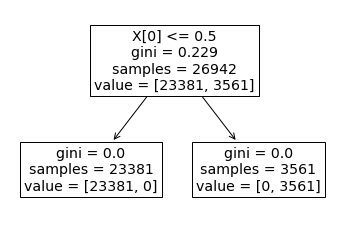

In [24]:
from sklearn.tree import plot_tree
plot_tree(home_model)

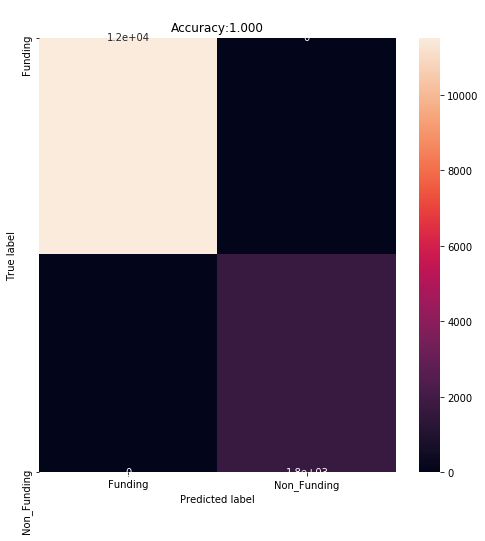

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf = SVC(kernel = 'linear').fit(train_X,train_y)
clf.predict(train_X)
y_pred = clf.predict(val_X)

# Creates a confusion matrix
cm = confusion_matrix(val_y, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Funding','Non_Funding'], 
                     columns = ['Funding','Non_Funding'])

plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('\nAccuracy:{0:.3f}'.format(accuracy_score(val_y, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
from sklearn import metrics
metrics.confusion_matrix(val_y, y_pred)

array([[11519,     0],
       [    0,  1752]])

In [27]:
metrics.confusion_matrix(y_pred, val_y)


array([[11519,     0],
       [    0,  1752]])

### Predicting predictions

In [28]:
print(predictions)

[0 0 1 ... 0 0 0]


## Creating Submission File

In [29]:
# submission = pd.DataFrame({"ID": test_data["ID"],"successful_investment": predictions})
# submission.to_csv('submission_final.csv', index=False)   